# Importation des librairies

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import datetime
import warnings

# import categorical api 
from pandas.api.types import CategoricalDtype

warnings.filterwarnings("ignore")

# Lecture du fichier data_cleaned_final_sans_dummies.cvs

In [111]:
file = open('../../conf/global_conf.yml', 'r') 
conf = yaml.safe_load(file)

In [112]:
conf['local_data_path'] + "accidents.csv"

'C:/Users/c.pelat/Lecteur_D/perso/formation/Datascientest/projet/data/PROJET_DS_Accidents/accidents.csv'

In [113]:
fich = conf['local_data_path'] + "accidents.csv"
df_old = pd.read_csv(fich, sep = ";", low_memory=False)
df = pd.read_csv(conf['local_data_path'] + "data_cleaned_final_sans_dummies.csv", index_col = 0, low_memory=False)

print(df_old.shape)
print(df.shape)
#print(df.info())
#df.head()

(494182, 55)
(447136, 41)


In [114]:
# Comparaison des proportions de gravité
print(df_old.grav.value_counts(dropna=True, normalize=True))
df.grav.value_counts(dropna=True, normalize=True)

grav
1.0    0.419846
4.0    0.399882
3.0    0.153855
2.0    0.026417
Name: proportion, dtype: float64


grav
1.0    0.412733
4.0    0.403430
3.0    0.156550
2.0    0.027287
Name: proportion, dtype: float64

In [115]:
# Define an ordered dictionnary of categories 
grav_mapping = {'1.0':'Indemne',
                '4.0':'Blessé léger', 
                '3.0':'Blessé hospitalisé',
                '2.0':'Tué'#,
                #'nan' : "Non renseigné"
                }

# Define the new orderded type
cat_grav_order = CategoricalDtype(categories=grav_mapping.values(), ordered=True)

# Recode the gravity with the dictionnary and format the created variable with the new ordered type
df["grav_rec"] = df.grav_rec.astype(cat_grav_order)

In [116]:
df['date']

0         2019-11-01
1         2019-11-01
2         2019-11-01
3         2019-11-01
4         2019-11-01
             ...    
494177    2022-01-01
494178    2022-01-01
494179    2022-01-01
494180    2022-03-01
494181    2022-03-01
Name: date, Length: 447136, dtype: object

# An-Mois

In [117]:
dates_str = df.an.astype('str') + "-" + df.mois.astype('str') + "-" + "01"
df["an-mois"] = pd.to_datetime(dates_str)

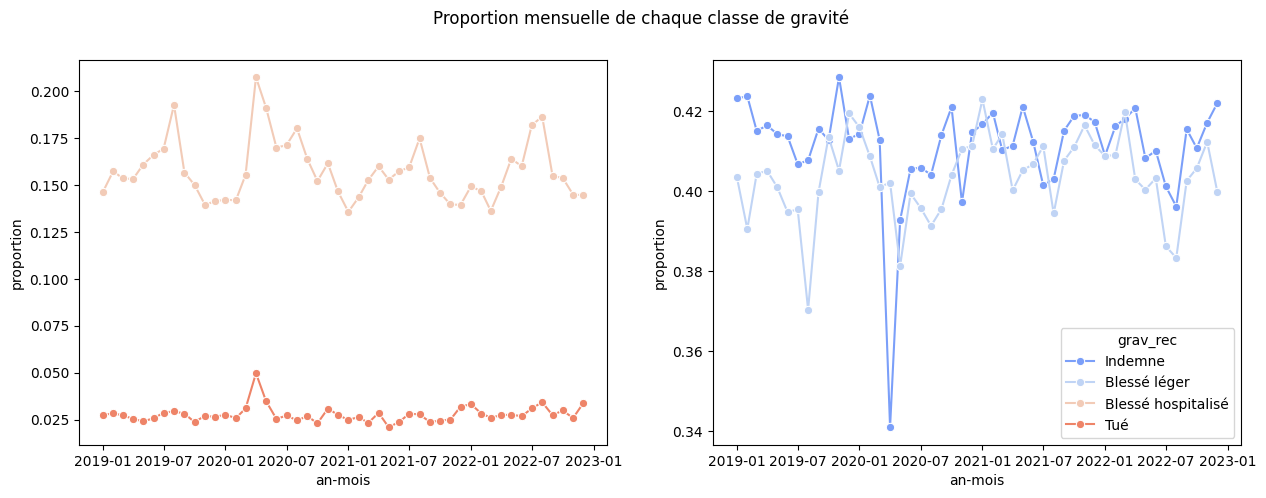

In [118]:
df_an_mois = pd.DataFrame(df.groupby('an-mois')['grav_rec'].value_counts(normalize=True)).reset_index()
 
# Plot de la série mensuelle 2019-2022, échelle réelle
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
ax = sns.lineplot(data=df_an_mois.loc[df_an_mois["grav_rec"].isin(["Tué", "Blessé hospitalisé"])], x='an-mois', y='proportion', hue="grav_rec", palette="coolwarm", marker='o')
#plt.title("Proportion mensuelle de chaque classe de gravité")
ax.get_legend().remove()

plt.subplot(1,2,2)
sns.lineplot(data=df_an_mois.loc[df_an_mois["grav_rec"].isin(["Indemne", "Blessé léger"])], x='an-mois', y='proportion', hue="grav_rec", palette="coolwarm", marker='o')
plt.suptitle("Proportion mensuelle de chaque classe de gravité")
plt.show()

# Jour de la semaine

In [119]:
# jour de la semaine
df['jour_semaine'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.weekday
df['jour_semaine'].value_counts(dropna=True)

# ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

jour_semaine
1    77306
4    74167
2    64481
0    62848
5    58072
3    56786
6    53476
Name: count, dtype: int64

In [120]:
dates_str = df_old.an.astype('str') + "-" + df_old.mois.astype('str') + "-" + df_old.jour.astype('str')
df_old['date'] = pd.to_datetime(dates_str)
df_old['jour_semaine'] = pd.to_datetime(df_old['date'], format='%Y-%m-%d').dt.weekday
df_old['jour_semaine'].value_counts(dropna=True)

jour_semaine
4    81515
5    72974
3    71101
2    70392
1    70041
0    66099
6    62060
Name: count, dtype: int64

In [121]:
# série temporelle jour de la semaine
df_jour_semaine = pd.DataFrame(df.groupby('jour_semaine')['grav_rec'].value_counts(normalize=True)).reset_index()
display(df_jour_semaine.head())

df_jour_semaine_an = pd.DataFrame(df.groupby(['jour_semaine', 'an'])['grav_rec'].value_counts(normalize=True)).reset_index()
df_jour_semaine_an.loc[(df_jour_semaine_an.an == 2019) & (df_jour_semaine_an.jour_semaine == 1)]

,jour_semaine,grav_rec,proportion
0,0,Indemne,0.410276
1,0,Blessé léger,0.402972
2,0,Blessé hospitalisé,0.159735
3,0,Tué,0.027018
4,1,Indemne,0.415776


,jour_semaine,an,grav_rec,proportion
16,1,2019,Indemne,0.417376
17,1,2019,Blessé léger,0.409064
18,1,2019,Blessé hospitalisé,0.148229
19,1,2019,Tué,0.025331


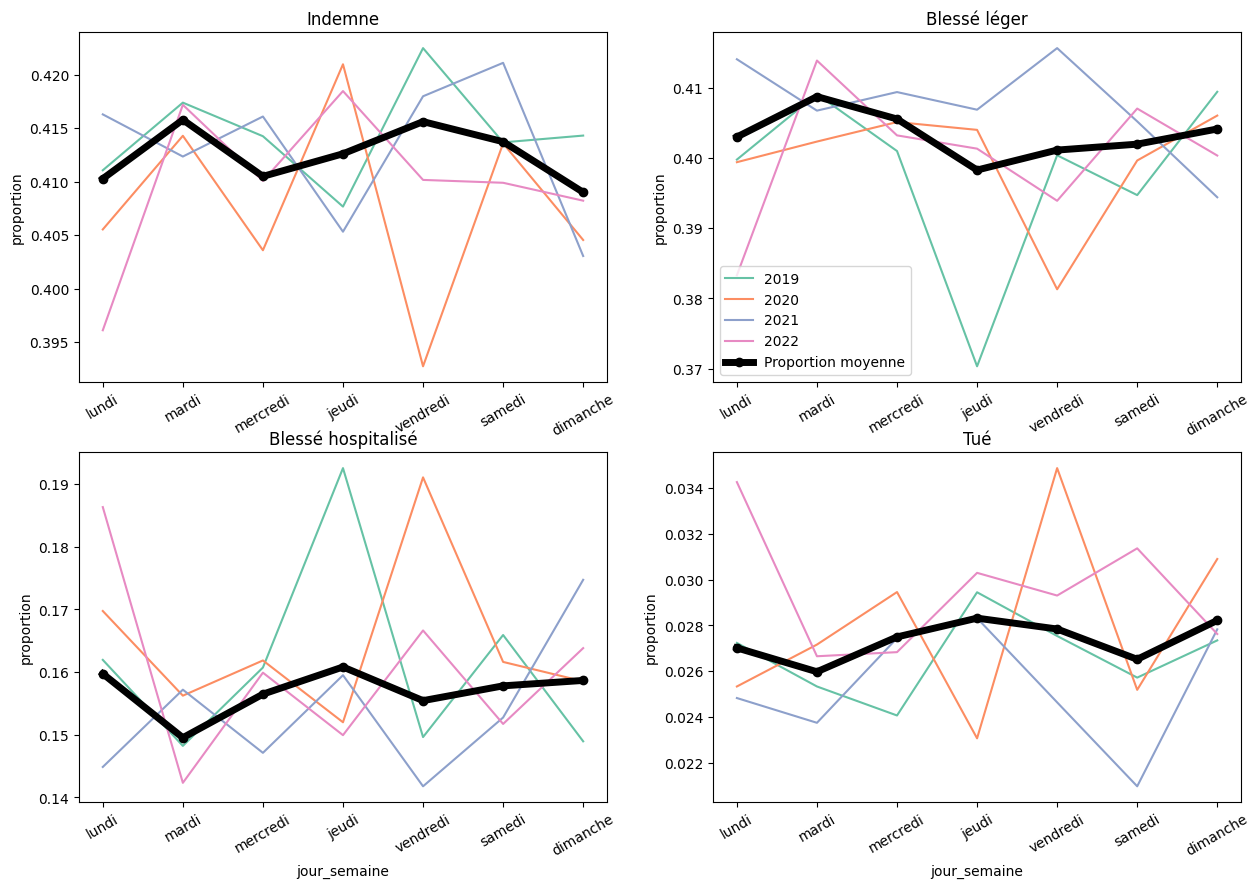

In [122]:
plt.figure(figsize=(15, 10))
#plt.subplots_adjust(bottom=0.9)

for i, g in enumerate(grav_mapping.values()) :
    plt.subplot(2, 2, i+1)

    ax = sns.lineplot(data=df_jour_semaine_an.loc[df_jour_semaine_an["grav_rec"].isin([g])], 
                    x='jour_semaine', 
                    y='proportion', 
                    hue="an", 
                    palette="Set2"
                    #,marker='o'
                    )
    plt.xticks(np.arange(0, 7, 1), ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'], rotation=30)
    if i != 1: 
        ax.get_legend().remove()

    if (i == 0) | (i == 1) : 
       ax.set_xlabel("")

    plt.plot(df_jour_semaine.loc[df_jour_semaine["grav_rec"] == g ]["jour_semaine"], 
             df_jour_semaine.loc[df_jour_semaine["grav_rec"] == g ]["proportion"], "-ko", linewidth=5, label="Proportion moyenne")
    plt.title(g)
    if i == 1:
        plt.legend()

plt.show()

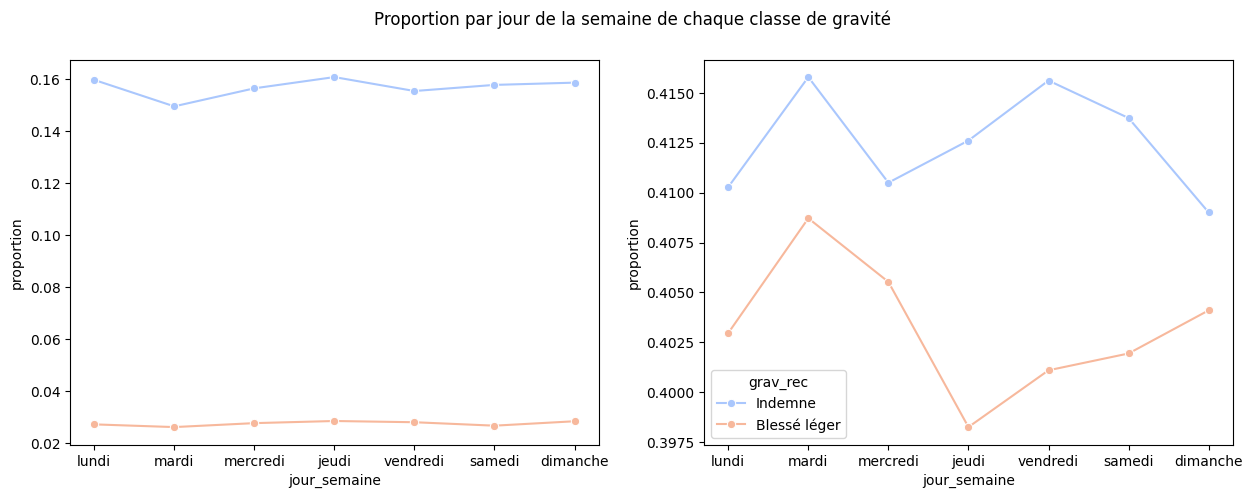

In [109]:
# Plot de la série  
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xticks(np.arange(0, 7, 1), ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
ax = sns.lineplot(data=df_jour_semaine.loc[df_jour_semaine["grav_rec"].isin(["Tué", "Blessé hospitalisé"])], x='jour_semaine', y='proportion', hue="grav_rec", palette="coolwarm", marker='o')
ax.get_legend().remove()

plt.subplot(1,2,2)
sns.lineplot(data=df_jour_semaine.loc[df_jour_semaine["grav_rec"].isin(["Indemne", "Blessé léger"])], x='jour_semaine', y='proportion', hue="grav_rec", palette="coolwarm", marker='o')
plt.suptitle("Proportion par jour de la semaine de chaque classe de gravité")
plt.xticks(np.arange(0, 7, 1), ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
plt.show()


In [123]:
df_old['jour_semaine'].value_counts().sort_index()
df['jour_semaine'].value_counts().sort_index()

jour_semaine
0    62848
1    77306
2    64481
3    56786
4    74167
5    58072
6    53476
Name: count, dtype: int64

## Week-end

In [124]:
# création d'une variable weekend à partir du jour de la semaine (Saturday is 5 and Sunday is 6)
df_old['weekend'] = df_old['jour_semaine'].apply(lambda x: 1 if x >= 5 else 0)
df['weekend'] = df['jour_semaine'].apply(lambda x: 1 if x >= 5 else 0)
display(df['weekend'].value_counts())

# création d'une variable weekend à partir du jour de la semaine (Saturday is 5 and Sunday is 6)
df_old['weekend_vend'] = df_old['jour_semaine'].apply(lambda x: 1 if x >= 4 else 0)
df['weekend_vend'] = df['jour_semaine'].apply(lambda x: 1 if x >= 4 else 0)
display(df['weekend_vend'].value_counts())

weekend
0    335588
1    111548
Name: count, dtype: int64

weekend_vend
0    261421
1    185715
Name: count, dtype: int64

In [125]:
# création d'une variable weekend à partir du jour de la semaine (Saturday is 5 and Sunday is 6)
df_old['weekend'] = df_old['jour_semaine'].apply(lambda x: 1 if x >= 5 else 0)
display(df_old['weekend'].value_counts())

# création d'une variable weekend à partir du jour de la semaine (Saturday is 5 and Sunday is 6)
df_old['weekend_vend'] = df_old['jour_semaine'].apply(lambda x: 1 if x >= 4 else 0)
display(df_old['weekend_vend'].value_counts())

weekend
0    359148
1    135034
Name: count, dtype: int64

weekend_vend
0    277633
1    216549
Name: count, dtype: int64

In [126]:
# Comparaison des proportions de jour de week-end
print(df_old.grav.value_counts(dropna=True, normalize=True))
df.grav.value_counts(dropna=True, normalize=True)

grav
1.0    0.419846
4.0    0.399882
3.0    0.153855
2.0    0.026417
Name: proportion, dtype: float64


grav
1.0    0.412733
4.0    0.403430
3.0    0.156550
2.0    0.027287
Name: proportion, dtype: float64

In [134]:
df_weekend = pd.crosstab(df.weekend, df.grav, normalize='index')*100
df_weekend

grav,1.0,2.0,3.0,4.0
weekend,,,,
0,41.315542,2.727154,15.599485,40.357820
1,41.146412,2.733352,15.821888,40.298347


In [135]:
df_weekend_vend = pd.crosstab(df.weekend_vend, df.grav, normalize='index')*100
df_weekend_vend

grav,1.0,2.0,3.0,4.0
weekend_vend,,,,
0,41.246113,2.710953,15.615042,40.427892
1,41.311687,2.753682,15.711170,40.223461


## Week-end sur base old

In [139]:
df_weekend_old = pd.crosstab(df_old.weekend, df_old.grav, normalize='index')*100
display(df_weekend_old)

df_weekend_vend_old = pd.crosstab(df_old.weekend_vend, df_old.grav, normalize='index')*100
display(df_weekend_vend_old)

grav,1.0,2.0,3.0,4.0
weekend,,,,
0,42.897062,2.432188,14.486148,40.184601
1,39.557598,3.199081,17.777613,39.465708


grav,1.0,2.0,3.0,4.0
weekend_vend,,,,
0,42.956564,2.398149,14.274645,40.370643
1,40.738482,2.954019,16.809678,39.497821


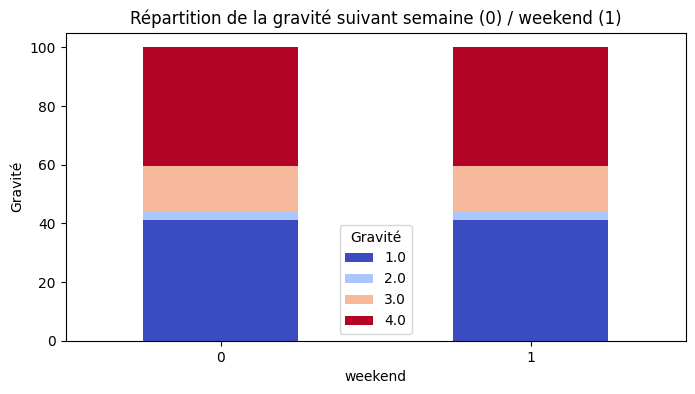

In [140]:
df_weekend.plot(kind='bar', stacked=True, figsize=(8, 4), rot=0, colormap='coolwarm')
plt.title("Répartition de la gravité suivant semaine (0) / weekend (1)")
plt.ylabel('Gravité')
plt.legend(title="Gravité")
plt.show()

# Heure

In [79]:
# Visualisation par tranche d'heure 
df['heure'].value_counts(dropna=False) 

heure
17    40708
18    38405
16    33647
19    28638
15    28120
14    25331
8     24772
12    23440
13    22581
11    22334
9     21068
10    19954
20    19670
7     18744
21    14202
22    11273
23     9905
6      9028
0      8194
1      6534
5      5995
2      5751
4      4429
3      4413
Name: count, dtype: int64

In [81]:
df_heure = pd.crosstab(df.heure, df.grav_rec, normalize='index')*100
df_heure

grav_rec,Indemne,Blessé léger,Blessé hospitalisé,Tué
heure,,,,
0,34.574079,42.762997,18.245057,4.417867
1,31.512091,42.133456,20.860116,5.494337
2,28.847157,44.896540,20.744218,5.512085
3,28.438704,43.258554,22.025833,6.276909
4,28.200497,42.786182,23.188079,5.825243
5,31.159299,42.802335,19.766472,6.271893
6,35.533895,42.246345,18.132477,4.087284
7,41.784038,39.948784,15.738370,2.528809
8,43.597610,42.192798,12.187147,2.022445


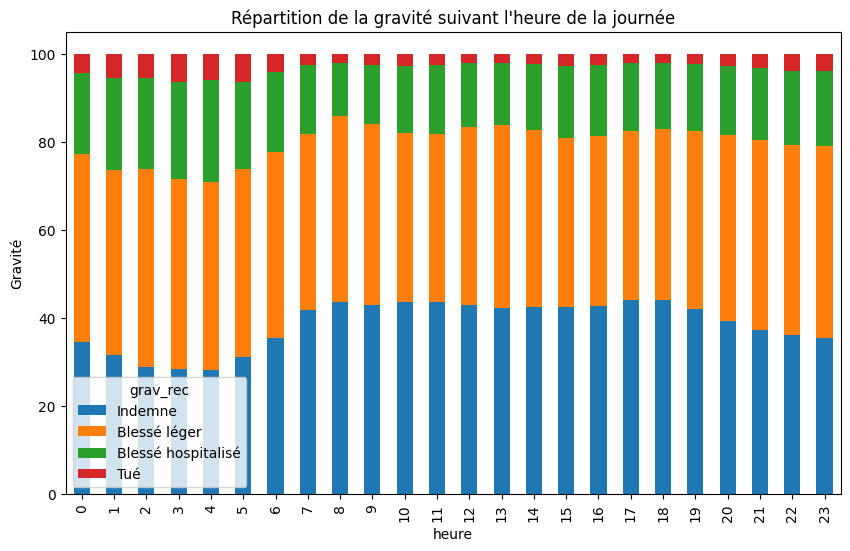

In [82]:
df_heure.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Répartition de la gravité suivant l'heure de la journée");
plt.ylabel('Gravité')
plt.show()

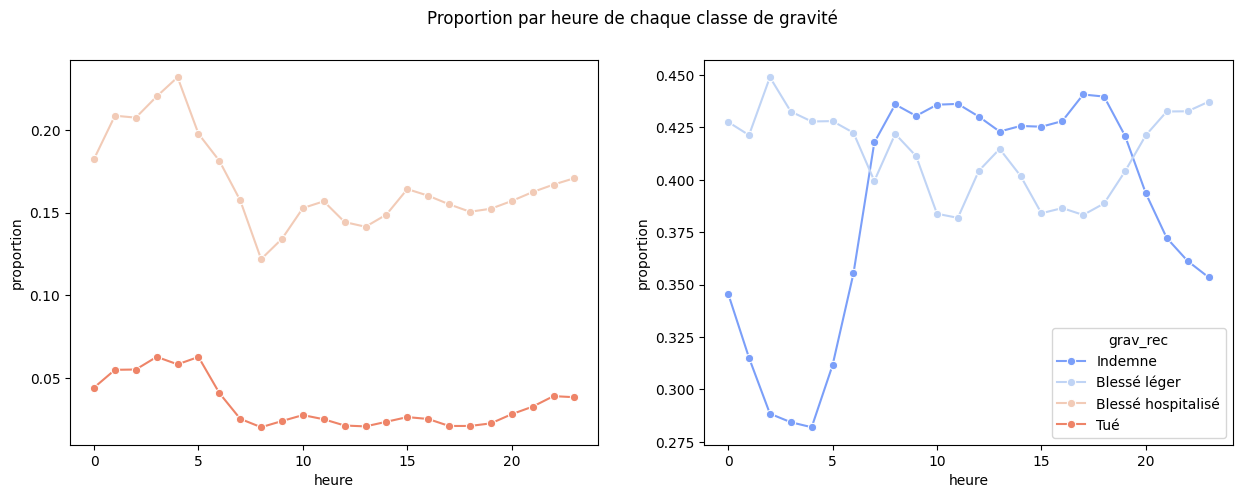

In [87]:
# série temporelle
df_heure2 = pd.DataFrame(df.groupby('heure')['grav_rec'].value_counts(normalize=True)).reset_index()
 
# Plot de la série  
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.lineplot(data=df_heure2.loc[df_heure2["grav_rec"].isin(["Tué", "Blessé hospitalisé"])], x='heure', y='proportion', hue="grav_rec", palette="coolwarm", marker='o')
ax.get_legend().remove()

plt.subplot(1,2,2)
sns.lineplot(data=df_heure2.loc[df_heure2["grav_rec"].isin(["Indemne", "Blessé léger"])], x='heure', y='proportion', hue="grav_rec", palette="coolwarm", marker='o')
plt.suptitle("Proportion par heure de chaque classe de gravité")
plt.show()
